In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# nfragments

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from ast import literal_eval as make_tuple
import matplotlib.pyplot as plt
import os

RESULT_NAME = "1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2"
figFolder = f'_results/{RESULT_NAME}_figures'
os.makedirs(figFolder, exist_ok=True)

data = pd.read_csv(f'_results/{RESULT_NAME}.txt', names=['score','acc','macs','params','path','fragments'])

sns.set_theme()

In [4]:
print('# network generated: ', len(data))

# network generated:  89


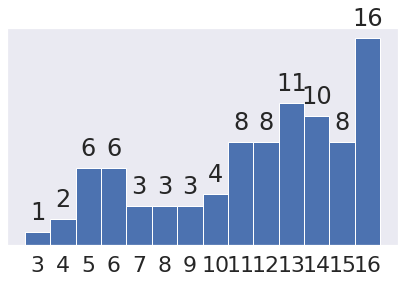

In [5]:
nfragments = [len(make_tuple(fragments)) for fragments in data['fragments']]

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=[7, 4])
sns.set(font_scale = 2)

ax.grid(False)
# ax.hist(nfragments)

# n, bins, patches = ax.hist(nfragments, bins=5)
n, bins, patches = ax.hist(nfragments, np.array(range(min(nfragments)-1,max(nfragments)+1))+0.5)
# plt.xticks(range(min(nfragments),max(nfragments)+1))
# plt.xlabel('Number of fragments')
# plt.tick_params(left = False, labelleft = False)

xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{}".format(int((value+bins[idx+1])/2.)) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
# plt.subplots_adjust(bottom=0.2)
plt.savefig(f'{figFolder}/numfragments.eps',bbox_inches='tight')

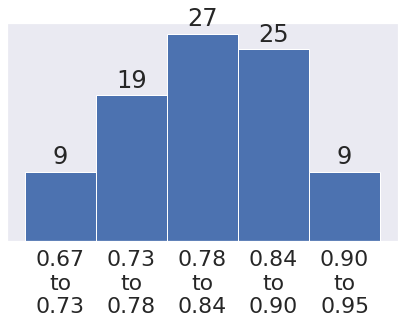

In [6]:
acc = data['acc']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(acc, bins=5)
# plt.xlabel('Accuracy')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')

plt.savefig(f'{figFolder}/accuracy.eps',bbox_inches='tight')

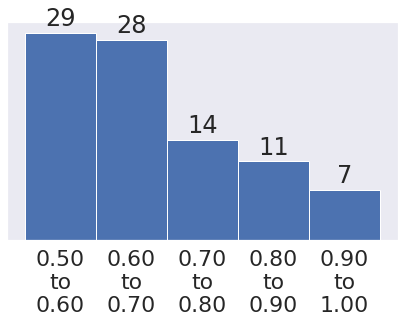

In [7]:
score = data['score']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(score, bins=5)
# plt.xlabel('Score')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/score.eps',bbox_inches='tight')

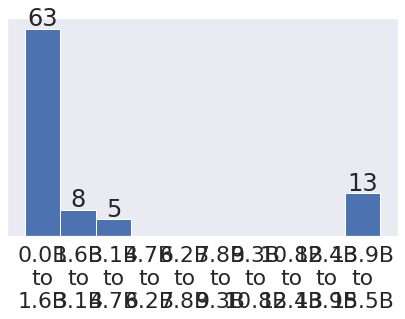

In [8]:
import matplotlib.pyplot as plt

macs = data['macs']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(macs, bins=10)
# plt.xlabel('# MACs (in billions)')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.1f}B\nto\n{:.1f}B".format(value/1000000000,bins[idx+1]/1000000000) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/macs.eps',bbox_inches='tight')

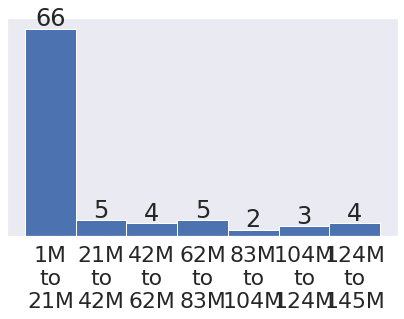

In [9]:
import matplotlib.pyplot as plt

params = data['params']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)

n, bins, patches = ax.hist(params, bins=7)
# plt.xlabel('# Params (in millions)')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.0f}M\nto\n{:.0f}M".format(value/1000000,bins[idx+1]/1000000) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/params.eps',bbox_inches='tight')

In [10]:
from glob import glob
import os
originalValTrainAcc = {}
originalFiles = sorted(glob('_results/original/*.txt'))
originalNetNames = []
for originalFile in originalFiles:
    name = os.path.basename(originalFile)
    name = os.path.splitext(name)[0]
    originalNetNames.append(name)
    originalValTrainAcc[name] = pd.read_csv(originalFile, names=['valacc', 'trainacc','macs','params','score','fragments'])
    
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


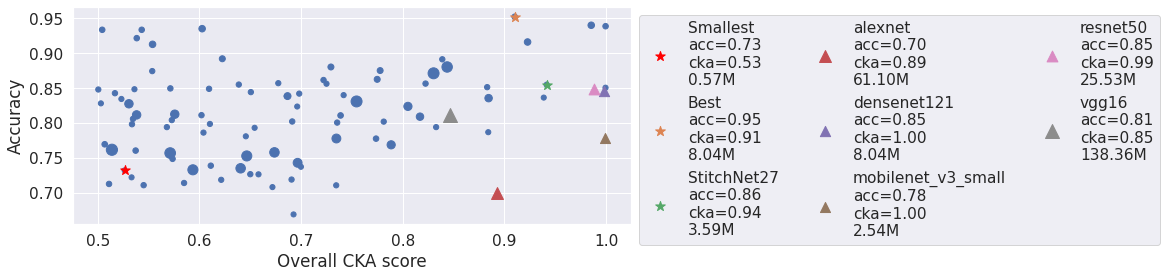

In [69]:
sns.set(font_scale = 1.4)

score = data['score']
acc = data['acc']
sizes = data['params']
sizefactor = 100./max(sizes)
sizes = 25+sizes*sizefactor

fig, ax = plt.subplots(figsize=[10, 4])

ax.scatter(score, acc, s=sizes)
plt.xlabel('Overall CKA score')
plt.ylabel('Accuracy')
# plt.ylim(0.4,1)
# plt.xlim(0.4,1.2)

acc_minidx = data['acc'].idxmin()
acc_maxidx = data['acc'].idxmax()
param_minidx = data['params'].idxmin()
param_maxidx = data['params'].idxmax()

netmeta = data.iloc[param_minidx]
ax.scatter(netmeta.score, netmeta.acc, marker="*", s=netmeta.params*sizefactor+100, 
           color="red", label=f"Smallest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M")
netmeta = data.iloc[acc_maxidx]
ax.scatter(netmeta.score, netmeta.acc, marker="*", s=netmeta.params*sizefactor+100, 
           label=f"Best\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M")
netmeta = data.iloc[27]
ax.scatter(netmeta.score, netmeta.acc, marker="*", s=netmeta.params*sizefactor+100, 
           label=f"StitchNet27\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M")
# ax.scatter(score[acc_minidx], acc[acc_minidx], marker="v", s=160,
#            label=f"Worst")

for originalNetName in originalNetNames:
    netmeta = originalValTrainAcc[originalNetName]
    ax.scatter(netmeta.score, netmeta.valacc, marker="^", s=netmeta.params*sizefactor+100,
           label=f"{originalNetName}\nacc={netmeta.valacc.item():.2f}\ncka={netmeta.score.item():.2f}\n{netmeta.params.item()/1e6:.2f}M")

ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))
plt.savefig(f'{figFolder}/accvscka.eps',bbox_inches='tight')

In [12]:
from skimage.io import imread
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM, renderPDF
from pdf2image import convert_from_path

In [53]:
for idx in data['acc'].nsmallest(100).index:
    item = data.iloc[idx]
    if item.score > 0.9:
        print(idx, item.score, item.acc)

31 0.9387292265891796 0.8365422396856581
26 0.9995001554488888 0.8506876227897839
27 0.941654677180258 0.8550098231827112
70 0.9228369777590658 0.9161100196463654
20 0.9995633363723612 0.9387033398821218
69 0.9854522978180464 0.9400785854616897
21 0.9101505875587336 0.9522593320235756


[0.90609391 1.         1.         1.         1.        ]
0 21
1 22
2 5
3 32
4 88


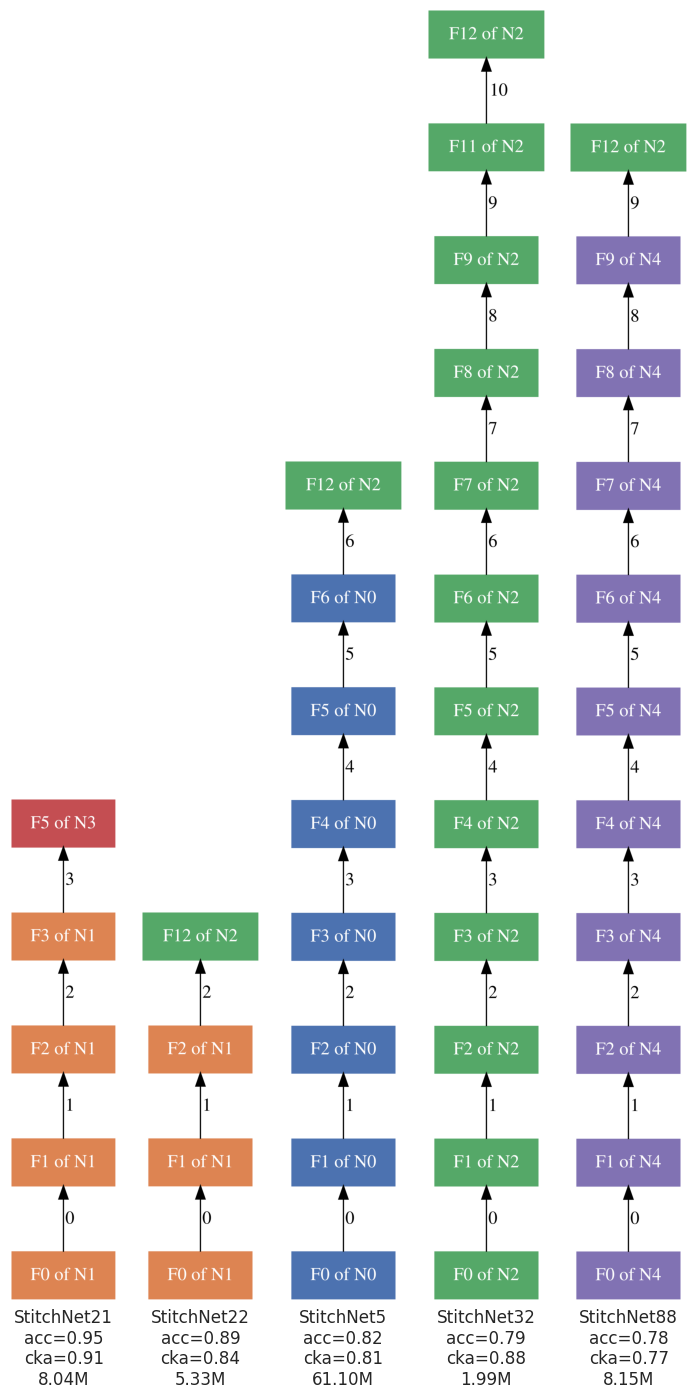

In [70]:
import os
sns.set(font_scale = 1.4)
def render_net(path):
    # if True or not os.path.exists(f"{path}.png"):
    drawing = svg2rlg(path)
    renderPDF.drawToFile(drawing, f'{path}.pdf')
    pages = convert_from_path(f'{path}.pdf', 600)
    pages[0].save(f'{path}.png', 'PNG')
    width = pages[0].width
    height = pages[0].height
    return width

def plot_net(ax, path, label):
    img = imread(path+'.png')
    ax.imshow(img)
    # ax.axis('off')
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax.get_yaxis().set_visible(False)
    # Hide grid lines
    ax.grid(False)
    ax.set_xlabel(label)

widths = []
# idxs = list(data['acc'].index)
idxs = [21,22,5,32,88]
for idx in idxs:
    netmeta = data.iloc[idx]
    width = render_net(netmeta.path)
    widths.append(width)

width_ratios = np.array(widths).astype(float)/max(widths)
print(width_ratios)
fig, axs = plt.subplots(1,len(idxs),figsize=[10, 70],gridspec_kw={'width_ratios': width_ratios})
for ax in axs:
    ax.set_anchor('S')

for i,idx in enumerate(idxs):
    print(i,idx)
    netmeta = data.iloc[idx]
    pages = plot_net(axs[i],netmeta.path, f'StitchNet{idx}\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')

# netmeta = data.iloc[param_minidx]
# pages = plot_net(axs[0],netmeta.path, f'Smallest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[acc_maxidx]
# plot_net(axs[1],netmeta.path, f'Best\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[param_maxidx]
# plot_net(axs[2],netmeta.path, f'Biggest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[acc_minidx]
# plot_net(axs[3],netmeta.path, f'Worst\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# plot_net(axs[1],data.iloc[param_maxidx].path, f'Biggest')
# plot_net(axs[2],data.iloc[acc_maxidx].path, f'Best')
# plot_net(axs[3],data.iloc[acc_minidx].path, f'Worst')
plt.tight_layout()
plt.savefig(f'{figFolder}/stitchnets.eps',bbox_inches='tight')

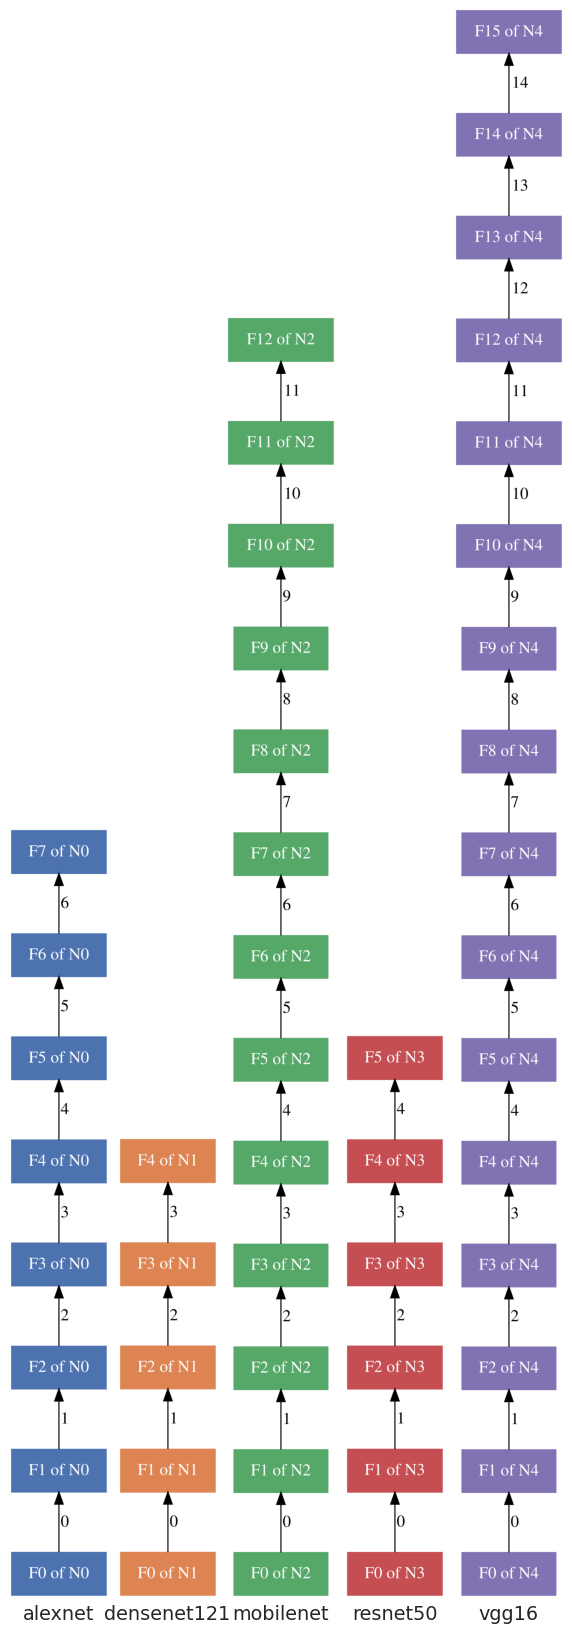

In [19]:
sns.set(font_scale = 1.6)

fig, axs = plt.subplots(1,len(originalNetNames),figsize=[10, 70],gridspec_kw={'wspace': 0.05,'width_ratios': [1,1,1.1,1,1.1]})
for ax in axs:
    ax.set_anchor('S')

for i,name in enumerate(originalNetNames): 
    if name == 'mobilenet_v3_small':
        textname = 'mobilenet'
    else:
        textname = name
    netmeta = originalValTrainAcc[name]
    plot_net(axs[i],f"_results/original/{name}.svg", f'{textname}')
    # plot_net(axs[i],f"_results/original/{name}.svg", f'{textname}\nacc={netmeta.valacc.item():.2f}\ncka={netmeta.score.item():.2f}\n{netmeta.params.item()/1e6:.2f}M')
    # plt.tight_layout()
    
plt.savefig(f'{figFolder}/originals.eps',bbox_inches='tight')



In [15]:
# from stitchnet.stitchonnx.utils import load_cats_and_dogs_dset
# dataset_train = load_cats_and_dogs_dset("train")
# dataset_val = load_cats_and_dogs_dset("test")

In [111]:
from glob import glob
import pandas as pd
import os
import seaborn as sns
ftdata = {}
filenames = sorted(glob('_results/finetune/*.txt'))
for filename in filenames:
    name = os.path.basename(filename).split('.')[0]    
    ftdata[name] = pd.read_csv(filename, names=['num_samples','acc'])
# ftdata

In [112]:
# series.num_samples

In [113]:
ftdata

{'alexnet':    num_samples       acc
 0           16  0.633202
 1           32  0.768566
 2           48  0.847741
 3           64  0.884086
 4           80  0.899018
 5           96  0.910806
 6          112  0.918271
 7          128  0.924165
 8          144  0.927505
 9          160  0.929862,
 'densenet121':    num_samples       acc
 0           16  0.648134
 1           32  0.672495
 2           48  0.746169
 3           64  0.837721
 4           80  0.887230
 5           96  0.853831
 6          112  0.818271
 7          128  0.850884
 8          144  0.916896
 9          160  0.946758,
 'mobilenet_v3_small':    num_samples       acc
 0           32  0.494695
 1           64  0.553635
 2           96  0.628094
 3          128  0.700589
 4          160  0.755796
 5          192  0.806680
 6          224  0.843026
 7          256  0.873870
 8          288  0.898428
 9          320  0.913752,
 'resnet50':    num_samples       acc
 0           32  0.400982
 1           64  0.561100
 

In [114]:
# series.acc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


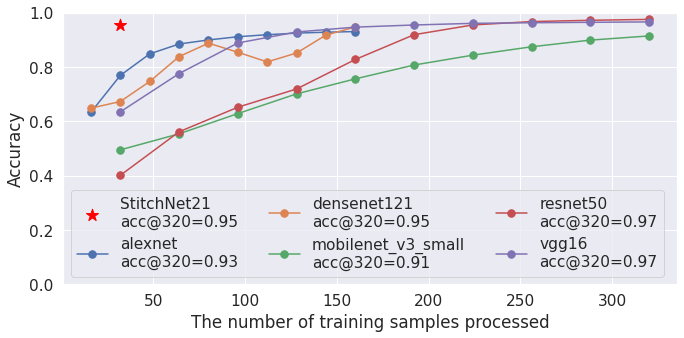

In [115]:
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(font_scale = 1.4)

fig, ax = plt.subplots(1,1,figsize=[11, 5])
sns.set(font_scale = 1.4)

idxs = list(data['acc'].nlargest(1).index)
netmeta = data.iloc[idxs[0]]
ax.scatter([32], netmeta.acc, marker="*", s=160, 
           color="red", label=f"StitchNet21\nacc@320={netmeta.acc:.2f}")

for k,series in ftdata.items():
    ax.plot(series.num_samples, series.acc, '.-', markersize=15, label=f'{k}\nacc@320={series.acc.iloc[-1]:.2f}')
# plt.xlim(0,400)
plt.ylim(0, 1)
ax.legend(loc="best", ncol=3)
plt.xlabel('The number of training samples processed')
plt.ylabel('Accuracy')

plt.savefig(f'{figFolder}/finetune.eps',bbox_inches='tight')

In [ ]:
# dataset_train[0][1]

In [ ]:
# from tqdm import tqdm
# numcat = len([x[1] for x in tqdm(dataset_train) if x[1] == 0])
# numdog = len([x[1] for x in tqdm(dataset_train) if x[1] == 1])
# print('train total', len(dataset_train))
# print('cat', numcat)
# print('dog', numdog)


In [ ]:
# from tqdm import tqdm
# numcat = len([x[1] for x in tqdm(dataset_val) if x[1] == 0])
# numdog = len([x[1] for x in tqdm(dataset_val) if x[1] == 1])
# print('train total', len(dataset_val))
# print('cat', numcat)
# print('dog', numdog)


In [ ]:
# catIds = [281,282,283,284,285]
# dogIds = list(range(151,251))

In [ ]:
# catIds

In [ ]:
# dogIds